# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Function-ptrans" data-toc-modified-id="Function-ptrans-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Function ptrans</a></div><div class="lev2 toc-item"><a href="#Synopse" data-toc-modified-id="Synopse-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Synopse</a></div><div class="lev2 toc-item"><a href="#Description" data-toc-modified-id="Description-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Description</a></div><div class="lev2 toc-item"><a href="#Examples" data-toc-modified-id="Examples-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Examples</a></div><div class="lev3 toc-item"><a href="#Example-1" data-toc-modified-id="Example-1-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Example 1</a></div><div class="lev3 toc-item"><a href="#Example-2" data-toc-modified-id="Example-2-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Example 2</a></div><div class="lev2 toc-item"><a href="#Equation" data-toc-modified-id="Equation-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Equation</a></div><div class="lev2 toc-item"><a href="#Contributions" data-toc-modified-id="Contributions-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Contributions</a></div>

# Function ptrans

## Synopse

Perform periodic translation in 1-D, 2-D or 3-D space.

- **g = ptrans(f, t)**
    - **OUTPUT**
        - **g**: Image. Periodically translated image.
    - **INPUT**
        - **f**: Image ndarray. Image to be translated.
        - **t**: Tuple. (tz,tr,tc)
    
## Description

Translate a 1-D, 2-D or 3-dimesional image periodically. This translation can be seen as a window view
displacement on an infinite tile wall where each tile is a copy of the original image. The
periodical translation is related to the periodic convolution and discrete Fourier transform.
Be careful when implementing this function using the mod, some mod implementations in C does not
follow the correct definition when the number is negative.

In [1]:
def ptrans(f,t):
    import numpy as np
    g = np.empty_like(f) 
    if f.ndim == 1:
      W = f.shape[0]
      col = np.arange(W)
      g = f[(col-t)%W]
    elif f.ndim == 2:
      H,W = f.shape
      rr,cc = t
      row,col = np.indices(f.shape)
      g = f[(row-rr)%H, (col-cc)%W]
    elif f.ndim == 3:
      Z,H,W = f.shape
      zz,rr,cc = t
      z,row,col = np.indices(f.shape)
      g = f[(z-zz)%Z, (row-rr)%H, (col-cc)%W]
    return g



In [2]:
# implementation using periodic convolution
def ptrans2(f, t):

    f, t = np.asarray(f), np.asarray(t).astype('int32')
    h = np.zeros(2*np.abs(t) + 1)
    t = t + np.abs(t)
    h[tuple(t)] = 1
    g = ia.pconv(f, h)
    return g

In [ ]:
def ptrans2d(f,t):
    rr,cc = t
    H,W = f.shape
    
    r = rr%H
    c = cc%W
        
    g = np.empty_like(f)
    
    g[:r,:c] = f[H-r:H,W-c:W]
    g[:r,c:] = f[H-r:H,0:W-c]
    g[r:,:c] = f[0:H-r,W-c:W]
    g[r:,c:] = f[0:H-r,0:W-c]

    return g

## Examples

In [3]:
testing = (__name__ == '__main__')
if testing:
    import numpy as np
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

### Example 1

Numeric examples in 2D and 3D.

In [4]:
if testing:
    # 2D example
    f = np.arange(15).reshape(3,5)

    print("Original 2D image:\n",f,"\n\n")
    print("Image translated by (0,0):\n",ia.ptrans(f, (0,0)).astype(int),"\n\n")
    print("Image translated by (0,1):\n",ia.ptrans(f, (0,1)).astype(int),"\n\n")
    print("Image translated by (-1,2):\n",ia.ptrans(f, (-1,2)).astype(int),"\n\n")

Original 2D image:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 


Image translated by (0,0):
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 


Image translated by (0,1):
 [[ 4  0  1  2  3]
 [ 9  5  6  7  8]
 [14 10 11 12 13]] 


Image translated by (-1,2):
 [[ 8  9  5  6  7]
 [13 14 10 11 12]
 [ 3  4  0  1  2]] 




In [5]:
if testing:
    # 3D example
    f1 = np.arange(60).reshape(3,4,5)

    print("Original 3D image:\n",f1,"\n\n")
    print("Image translated by (0,0,0):\n",ia.ptrans(f1, (0,0,0)).astype(int),"\n\n")
    print("Image translated by (0,1,0):\n",ia.ptrans(f1, (0,1,0)).astype(int),"\n\n")
    print("Image translated by (-1,3,2):\n",ia.ptrans(f1, (-1,3,2)).astype(int),"\n\n")

Original 3D image:
 [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]] 


Image translated by (0,0,0):
 [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]] 


Image translated by (0,1,0):
 [[[15 16 17 18 19]
  [ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[35 36 37 38 39]
  [20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]]

 [[55 56 57 58 59]
  [40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]]] 


Image translated by (-1,3,2):
 [[[28 29 25 26 27]
  [33 34 30 31 32]
  [38 39 35 36 37]
  [23 24 20 21 22]]

 [[48 49 45 46 47]
  [53 54 50 51 52]
  [58 59 55 56 57]
  [43 44 40 41 42]]

 [[ 8  9  5  6  7]
  [

### Example 2

Image examples in 2D

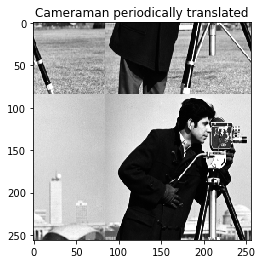

In [6]:
if testing:
    # 2D example
    f = mpimg.imread('../data/cameraman.tif')
    plt.imshow(f,cmap='gray'), plt.title('Original 2D image - Cameraman')
    plt.imshow(ia.ptrans(f, np.array(f.shape)//3),cmap='gray'), plt.title('Cameraman periodically translated')

## Equation

For 2D case we have

$$ \begin{matrix}
    t   &=& (t_r t_c),\\
    g = f_t &=& f_{tr,tc},\\
    g(rr,cc) &=& f((rr-t_r)\ mod\ H, (cc-t_c) \ mod\ W), 0 \leq rr < H, 0 \leq cc < W,\\
    \mbox{where}  & &  \\ a  \ mod\   N  &=& (a + k N) \ mod\ N, k \in Z.
\end{matrix} $$

The equation above can be extended to n-dimensional space.

In [7]:
if testing:
    print('testing ptrans')
    f = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]],'uint8')
    print(repr(ia.ptrans(f, [-1,2]).astype(np.uint8)) == repr(np.array(
          [[ 9, 10,  6,  7,  8],
           [14, 15, 11, 12, 13],
           [ 4,  5,  1,  2,  3]],'uint8')))

testing ptrans
True


## Contributions

- Roberto A Lotufo, Sept 2013, converted to index computation
- André Luis da Costa, 1st semester 2011